# Intro data science - portfolio assignment 19: Clustering on the penguins dataset

30 min: Create a cluster model on the penguins dataset.

- Use the pairplot() function on the penguins dataset. Do you visually notice any clusters? How many clusters do you think there are?
- Use the KMeans algorithm to create a cluster model. Apply this model to the dataset to create an extra column 'cluster' just like we did for the iris dataset above.
- Calculate the Silhouette Coefficient for your clustering. Play around with the features and n_clusters to search for better results. Keep the cluster model with the highest Silhouette Coefficient.
- Use the pairplot(hue='cluster') function to observe how the model has clustered the data.
- We know the species of each penguin. Use a contingency table to reveal the relation between the cluster results and the species. Is there an exact match? Are there species which ended up in the same cluster? If so, what does it mean that they ended up in the same cluster?

In [16]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Filling the blanks

First, we will fill the missing values of each column with the mean of that column.

In [17]:
penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(value=penguins['bill_length_mm'].mean())
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(value=penguins['bill_depth_mm'].mean())
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(value=penguins['flipper_length_mm'].mean())
penguins['body_mass_g'] = penguins['body_mass_g'].fillna(value=penguins['body_mass_g'].mean())
penguins['sex'] = penguins['sex'].fillna(value='Male')

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


## Pairplot

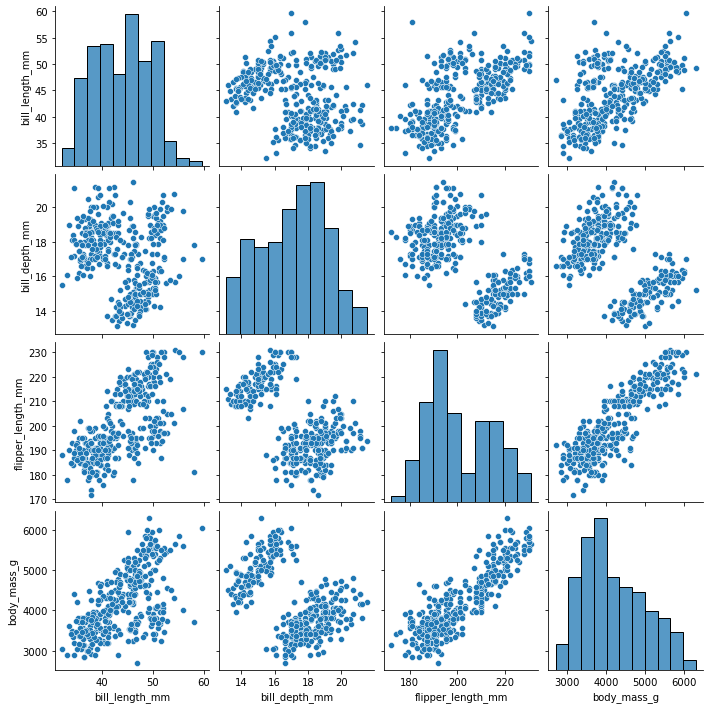

In [18]:
sns.pairplot(penguins)

Looking at the scatter plots for flipper length - bill depth and body mass - flipper length, there are two obvious clusters. The other scatter plots are more all over the place. I think there are 2 clusters.

## Creating the cluster model

In [35]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=2, random_state=42).fit(penguins[features])

In [30]:
penguins['cluster'] = km.predict(penguins[features])

In [31]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,0
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male,2
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,0


In [32]:
penguins.cluster.value_counts()

0    170
2    106
1     68
Name: cluster, dtype: int64

# Silhouette Coefficient

In [33]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [36]:
# You can change the features and n_clusters in the k-means above and check the impact on the Silhouette Coefficient
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.6270788983213472

## Pairplot with hue

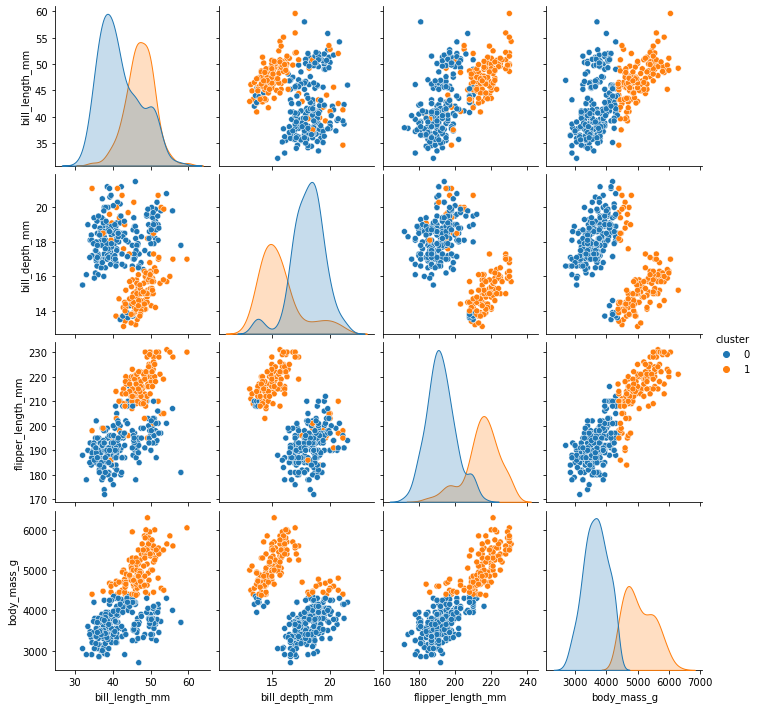

In [25]:
sns.pairplot(penguins, hue='cluster')

## Contingency table

In [28]:
contingency_table = penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)

contingency_table

cluster,0,1
species,,
Adelie,138,14
Chinstrap,63,5
Gentoo,10,114


In this contingency table, we can see that there are no exact matches. All penguin types are present in both clusters. This means that it's impossible to 100% differentiate one species from the others based on the features we have chosen.

2 clusters seems to be the most accurate, as it returns a silhouette score of 0.62. The higher the cluster count, the lower the score gets.